<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Install-and-load-libraries" data-toc-modified-id="Install-and-load-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Install and load libraries</a></span></li><li><span><a href="#What-is-Prophet?" data-toc-modified-id="What-is-Prophet?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>What is Prophet?</a></span></li><li><span><a href="#Load-and-Summarize-Dataset" data-toc-modified-id="Load-and-Summarize-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load and Summarize Dataset</a></span><ul class="toc-item"><li><span><a href="#Plot-the-time-series" data-toc-modified-id="Plot-the-time-series-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plot the time series</a></span></li></ul></li><li><span><a href="#Forecast-Temperature-Anomalies-With-Prophet" data-toc-modified-id="Forecast-Temperature-Anomalies-With-Prophet-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Forecast Temperature Anomalies With Prophet</a></span><ul class="toc-item"><li><span><a href="#Prophet-Model" data-toc-modified-id="Prophet-Model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Prophet Model</a></span><ul class="toc-item"><li><span><a href="#Fit-the-model" data-toc-modified-id="Fit-the-model-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Fit the model</a></span></li><li><span><a href="#Make-predictions" data-toc-modified-id="Make-predictions-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Make predictions</a></span></li><li><span><a href="#Plot-components" data-toc-modified-id="Plot-components-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Plot components</a></span></li><li><span><a href="#Plot-change-points" data-toc-modified-id="Plot-change-points-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Plot change-points</a></span></li></ul></li><li><span><a href="#Manually-Evaluate-Forecast-Model" data-toc-modified-id="Manually-Evaluate-Forecast-Model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Manually Evaluate Forecast Model</a></span><ul class="toc-item"><li><span><a href="#Calculate-MAE-and-RMSE--between-expected-and-predicted-values" data-toc-modified-id="Calculate-MAE-and-RMSE--between-expected-and-predicted-values-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Calculate MAE and RMSE  between expected and predicted values</a></span></li></ul></li><li><span><a href="#Change-hyperparameters" data-toc-modified-id="Change-hyperparameters-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Change hyperparameters</a></span><ul class="toc-item"><li><span><a href="#ChangePoints-in-Prophet" data-toc-modified-id="ChangePoints-in-Prophet-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>ChangePoints in Prophet</a></span></li><li><span><a href="#Add-Seasonality" data-toc-modified-id="Add-Seasonality-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Add Seasonality</a></span></li><li><span><a href="#Adding-External-Regressors" data-toc-modified-id="Adding-External-Regressors-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Adding External Regressors</a></span></li><li><span><a href="#Adding-Holidays-or-Special-Events" data-toc-modified-id="Adding-Holidays-or-Special-Events-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Adding Holidays or Special Events</a></span></li></ul></li></ul></li><li><span><a href="#Further-materials" data-toc-modified-id="Further-materials-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Further materials</a></span></li></ul></div>

# Install and load libraries

In [1]:
#!conda install -c conda-forge fbprophet

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [115]:
import fbprophet
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

# What is Prophet?

Prophet is a facebooks’ open source time series prediction. Prophet decomposes time series into trend, seasonality and holiday. It has intuitive hyper parameters which are easy to tune.

> Prophet time series = Trend + Seasonality + Holiday + error


- `Trend` models non periodic changes in the value of the time series.


- `Seasonality` is the periodic changes like daily, weekly, or yearly seasonality.


- `Holiday` effect which occur on irregular schedules over a day or a period of days.


- `Error` terms is what is not explained by the model.


Some of the useful functions present in the library fbprophet listed below: 

- `model.fit`: fit the model with the historical data


- `model.predict`: predict data based on given dates


- `model.plot_components`: separate the contributions of different components of the time series model and forecast


- `model.add_seasonality`: change the default seasonality


- `model.add_regressors`: add additional variables in the time series model


- `model.seasonalities`


# Load and Summarize Dataset 

In [130]:
df = pd.read_csv('../Data/temp_clean.csv')

We can see that as we expected, there are 1668 months worth of data and two columns. The first column is the date and the second is the average temperature in Celsius.

In [131]:
df.head()

,date,Avg_anomalies
0,1880-01-31,-0.29
1,1880-02-29,-0.18
2,1880-03-31,-0.11
3,1880-04-30,-0.20
4,1880-05-31,-0.12


In [132]:
df.tail()

,date,Avg_anomalies
1663,2018-08-31,0.73
1664,2018-09-30,0.76
1665,2018-10-31,0.99
1666,2018-11-30,0.78
1667,2018-12-31,0.89


In [133]:
df.shape

(1668, 2)

## Plot the time series


We can clearly see the trend in average temperature over time and a monthly seasonal pattern to the temperature. These are patterns we expect the forecast model to take into account.

In [134]:
fig = px.line(df, x="date", y="Avg_anomalies",  title='Evolution of average temperatures sales over time')
fig.show()

# Forecast Temperature Anomalies With Prophet

In this section, we will explore using the Prophet to forecast the anomalies temperature dataset.

## Prophet Model

To use Prophet for forecasting:

1. A **Prophet()** object is defined and configured,


2. Fit on the dataset by calling the **fit()** function and passing the data.

The `fit()` function takes a DataFrame of time series data. The DataFrame must have a specific format: 

1. The first column must have the name `ds` and contain the date-times. 


2. The second column must have the name `y` and contain the observations.

In [140]:
df.dtypes

date              object
Avg_anomalies    float64
dtype: object

### Fit the model 

In [141]:
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

In [11]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [86]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -54.0013


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2784.17    0.00211607       110.744      0.6503      0.6503      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     169        2794.4   0.000669046       129.122   2.742e-06       0.001      231  LS failed, Hessian reset 
     199       2797.26   2.05312e-05       57.2649       0.142       0.142      266   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     277       2798.82    0.00056925       132.605   4.177e-06       0.001      396  LS failed, Hessian reset 
     294       2799.28   1.82064e-09       98.2704   1.465e-07     0.09791      431   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


### Make predictions

[Here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) is a reference to the acceptable freq parameter aliases

In [72]:
# We want to predict the next 50 years, so I set a period of 50. In this step I have created a dataframe with the dates of the next 50 years.
future = model.make_future_dataframe(periods=50, freq='Y')
future.tail()

,ds
1713,2064-12-31
1714,2065-12-31
1715,2066-12-31
1716,2067-12-31
1717,2068-12-31


In [73]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1713,2064-12-31,1.877412,1.609619,2.112012
1714,2065-12-31,1.829812,1.573003,2.070730
1715,2066-12-31,1.788028,1.528880,2.035932
1716,2067-12-31,1.780507,1.491462,2.048629
1717,2068-12-31,1.815986,1.540698,2.072363


Prophet returns a large DataFrame with many interesting columns, but we subset our output to the columns most relevant to forecasting, which are:

- `ds`: the datestamp of the forecasted value


- `yhat`: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)


- `yhat_lower`: the lower bound of our forecasts


- `yhat_upper`: the upper bound of our forecasts
  
A variation in values from the output presented above is to be expected as Prophet relies on Markov chain Monte Carlo (MCMC) methods to generate its forecasts. MCMC is a stochastic process, so values will be slightly different each time.

### Plot components 

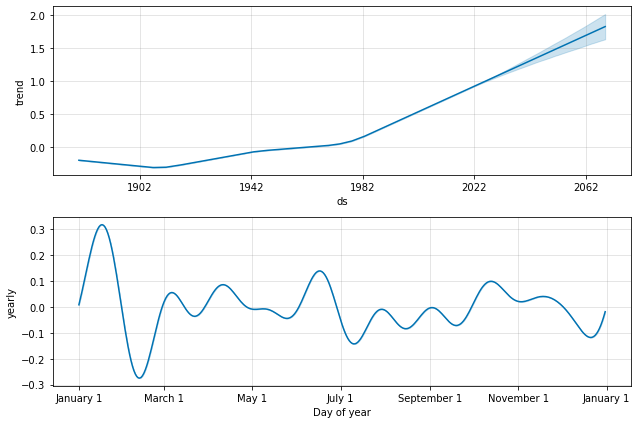

In [91]:
fig1 = model.plot_components(forecast)

**What this plot means?**

- `X-axis`:  represents the date values (ds ) for both history and future dates.


- `Y-axis`: represents the prophet estimate for respective forecast compoent (trend, seasonality)


- `Graph1`: trend value for all dates(history and future).


- `Graph2`: yearly_seasonality a yearly profile for each day in a week based on the training data.


As we can see it is very easy to start and get a reasonable forecast model on your time series data using prophet.


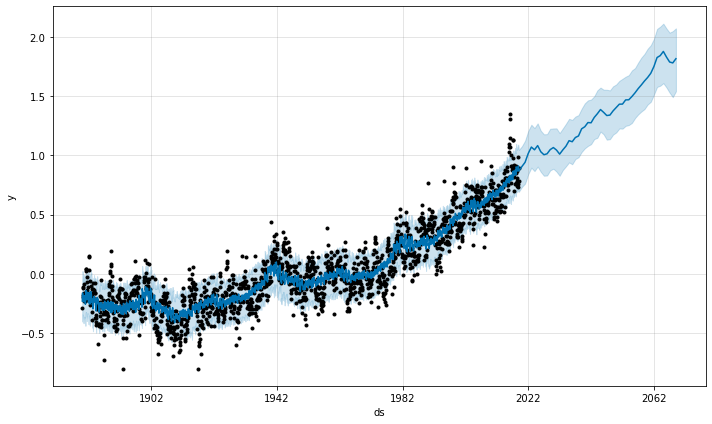

In [75]:
# uncertainty is the error of our predictions
fig1 = model.plot(forecast, uncertainty = True)

### Plot change-points 

Changepoints are the datetime points where the time series have abrupt changes in the trajectory.

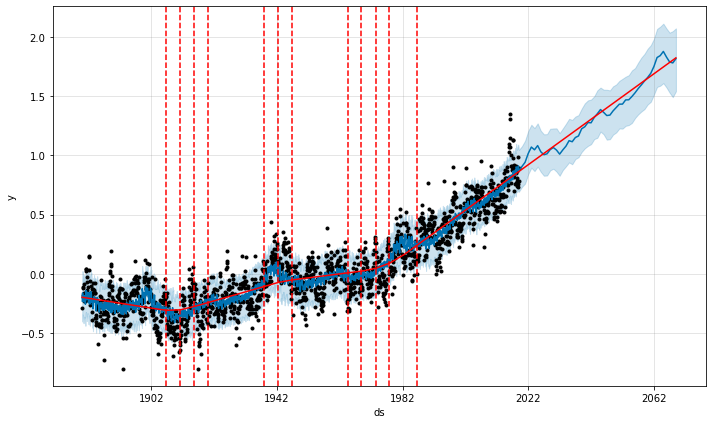

In [113]:
fig4 = model.plot(forecast)
a = add_changepoints_to_plot(fig4.gca(), model, forecast)

In [128]:
pd.DataFrame(model.changepoints).head()

,ds
53,1884-06-30
107,1888-12-31
160,1893-05-31
213,1897-10-31
267,1902-04-30


This Prophet plot does not contain all the change points, only the most important ones. If you want to view all of them you could use the following code:

In [122]:
# Listing all the change points in the model
deltas = model.params['delta'].mean(0)
cp = pd.DataFrame(model.changepoints) # get all the change points dates
cp['deltas'] = deltas
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Bar(x=cp['ds'], y=cp['deltas'], name='CPs',))


## Manually Evaluate Forecast Model

It is critical to develop an objective estimate of a forecast model’s performance.

This can be achieved by holding some data back from the model, such as the last 12 years. Then, fitting the model on the first portion of the data, using it to make predictions on the held-pack portion, and calculating an error measure, such as the mean absolute error across the forecasts. E.g. a simulated out-of-sample forecast.

The score gives an estimate of how well we might expect the model to perform on average when making an out-of-sample forecast.

We can do this with the samples data by creating a new DataFrame for training with the last 12 months removed.

In [104]:
# create train dataset, remove last 12 months
train = df.drop(df.index[-12:])
train.tail(12)

,ds,y
1644,2017-01-31,0.98
1645,2017-02-28,1.13
1646,2017-03-31,1.13
1647,2017-04-30,0.92
1648,2017-05-31,0.89
1649,2017-06-30,0.70
1650,2017-07-31,0.82
1651,2017-08-31,0.87
1652,2017-09-30,0.76
1653,2017-10-31,0.88


In [105]:
test = df.drop(df.index[:-12])
test.tail(12)

,ds,y
1656,2018-01-31,0.77
1657,2018-02-28,0.85
1658,2018-03-31,0.91
1659,2018-04-30,0.87
1660,2018-05-31,0.81
1661,2018-06-30,0.74
1662,2018-07-31,0.78
1663,2018-08-31,0.73
1664,2018-09-30,0.76
1665,2018-10-31,0.99


In [106]:
y_pred = model.predict(test)

In [107]:
y_pred["yhat"].values

array([0.80338237, 0.81701036, 0.83219031, 0.8104537 , 0.79669968,
       0.79260098, 0.81180051, 0.81735702, 0.82612117, 0.84974878,
       0.83976027, 0.80600478])

### Calculate MAE and RMSE  between expected and predicted values

In [108]:
# calculate MAE between expected and predicted values for december
mae = mean_absolute_error(test.y.values, y_pred["yhat"].values)
mae

0.06157622581299177

In [109]:
test["y_pred"] = y_pred["yhat"].values
test.head()

,ds,y,y_pred
1656,2018-01-31,0.77,0.803382
1657,2018-02-28,0.85,0.817010
1658,2018-03-31,0.91,0.832190
1659,2018-04-30,0.87,0.810454
1660,2018-05-31,0.81,0.796700


In [110]:
rmse = sqrt(mean_squared_error(test.y.values, y_pred["yhat"].values))
rmse

0.06955692696859332

In [112]:
fig = px.line(test, x='ds', y=test.columns[1:3])
fig.show()

## Change hyperparameters

### ChangePoints in Prophet

Changepoints are the datetime points where the time series have abrupt changes in the trajectory.

By default, Prophet adds 25 changepoints to the initial 80% of the data-set in order to have plenty of runway for projecting the trend forward and to avoid overfitting fluctuations at the end of the time series. 

Let’s plot the vertical lines where the potential changepoints occurred 

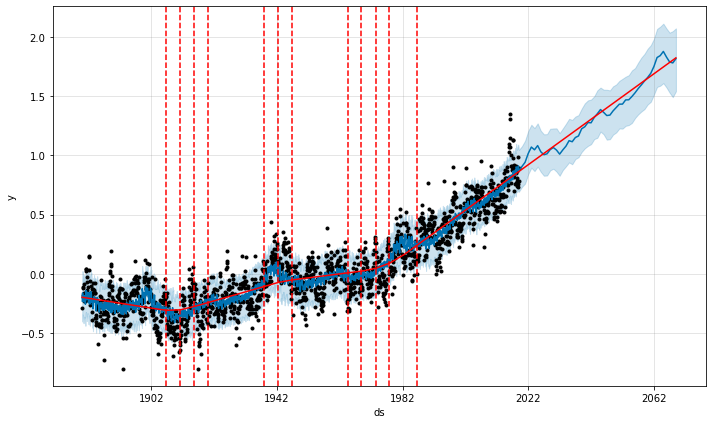

In [92]:
fig2 = model.plot(forecast)
a = add_changepoints_to_plot(fig2.gca(), model, forecast)

In [93]:
model.changepoints

53     1884-06-30
107    1888-12-31
160    1893-05-31
213    1897-10-31
267    1902-04-30
320    1906-09-30
373    1911-02-28
427    1915-08-31
480    1920-01-31
533    1924-06-30
587    1928-12-31
640    1933-05-31
693    1937-10-31
746    1942-03-31
800    1946-09-30
853    1951-02-28
906    1955-07-31
960    1960-01-31
1013   1964-06-30
1066   1968-11-30
1120   1973-05-31
1173   1977-10-31
1226   1982-03-31
1280   1986-09-30
1333   1991-02-28
Name: ds, dtype: datetime64[ns]

We can change the inferred changepoint range by setting the `changepoint_range`

By default, Prophet will automatically detect these changepoints and will allow the trend to adapt appropriately.

However, if we wish to have finer control over this process (e.g., Prophet missed a rate change, or is overfitting rate changes in the history), then we can use `changepoint_range` method

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -54.0013
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2784.02     0.0123092       119.063      0.4586      0.4586      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2795.6    0.00923744       117.867           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       2795.68     0.0011143        127.29   8.896e-06       0.001      286  LS failed, Hessian reset 
     299       2796.43   3.02616e-05        71.766      0.4409      0.4409      408   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2796.53   4.18492e-06       69.9312       2.136      0.2136      551   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     471       2799.28    0.00276455    

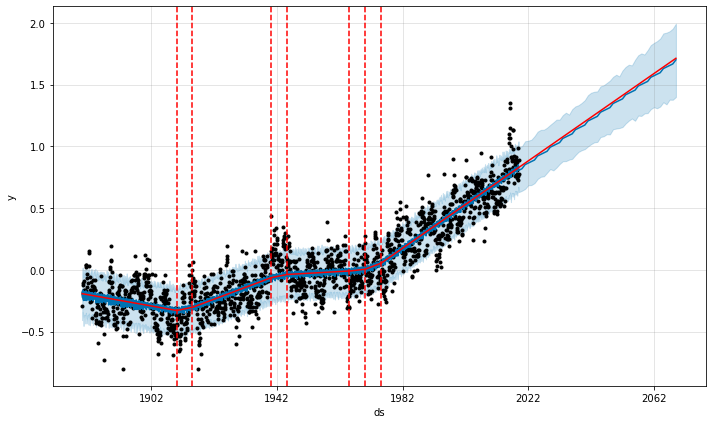

In [125]:
model1= Prophet(changepoint_range=0.9) # we can also specify the change points manually (writting the specific dates as strings)
forecast = model1.fit(df).predict(future)
fig= model1.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), model1, forecast)

### Add Seasonality

In Prophet we can model custom seasonalities using the functions `Prophet.add_seasonality`.

By default Prophet automatically models a additive daily, weekly, yearly seasonalities based on available training data.

We can get the details of inferred seasonalities using the function Prophet.seasonalities

Let us now use the above method to model a monthly seasonality.

In [88]:
model2 = Prophet()
model2.add_seasonality(name='custom_monthly', period=30.5, fourier_order=10)
model2.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -54.0013


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2866.41     0.0077141       203.951      0.5116      0.5116      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     174       2880.29   0.000388639       101.273   3.349e-06       0.001      247  LS failed, Hessian reset 
     199       2881.17   0.000722054       100.598      0.3674           1      278   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       2882.99    0.00270445       234.446   2.008e-05       0.001      341  LS failed, Hessian reset 
     270       2884.43    0.00230845       140.617   2.253e-05       0.001      443  LS failed, Hessian reset 
     299       2884.52   5.42145e-06       74.0361      0.3606           1      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     322       2884.52   5.92825e-08  

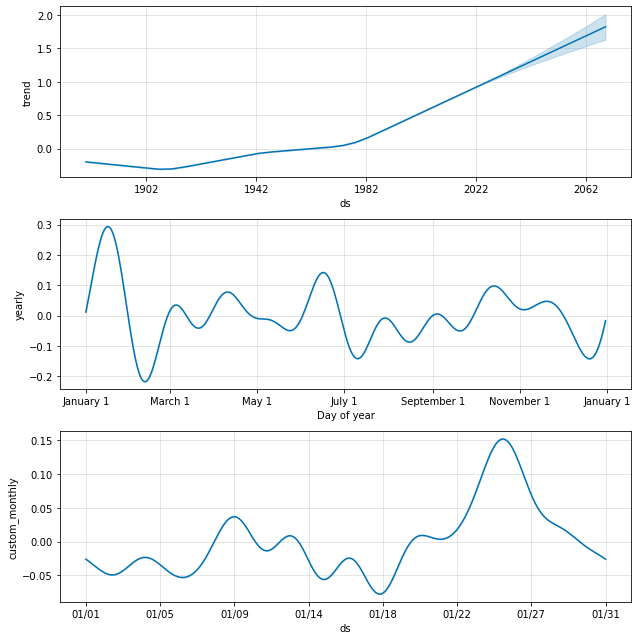

In [89]:
fig1 = model2.plot_components(forecast)

### Adding External Regressors 

**NOTE**: In this example we dont have external regressors, so the code below is not applicable to this example. 

Till now the prophet model is not able to model some of points in the training data. We know that these values deviate from the regular value because of the external regressors (regr1, regr2).

Let us now see how to capture these values and model them.


- Similar to seasonalities prophet also has a way to capture/model external factors which have an effect on the target value using the function Prophet.add_regressors.


- In the sample data we are using we have mentioned that there are two external regressors which are effecting the target value.


- In order to model and predict the regressor effects, both the training and prediction dataframes should contain the regressor data.


- Let us now see how to model these regressors using the above function.


**Note** : The regressor’s should be numeric values, you will have to perform one hot encoding if the regressor contains string data.

In [90]:
model3 = Prophet()
model3.add_regressor('regr1') # regr1 is a variable that we know is important for our data

In [ ]:
# fit and predcit
model3.fit(df_train3)
forecast3 = model3.predict(df_predict3)

### Adding Holidays or Special Events

Holidays and events can cause changes to a time series. 

We can create a custom holiday list for Prophet by creating a dataframe with two columns ds and holiday. A row for each occurrence of the holiday


In [137]:
temp_season = pd.DataFrame({
  'holiday': 'temp season',
  'ds': pd.to_datetime(['2014-07-31', '2014-09-16', 
                        '2015-07-31', '2015-09-16',
                        '2016-07-31', '2016-09-16',
                        '2017-07-31', '2017-09-16',
                       '2018-07-31', '2018-09-16',
                        '2019-07-31', '2019-09-16']),
  'lower_window': -1,
  'upper_window': 0,
})
temp_season.head()

,holiday,ds,lower_window,upper_window
0,temp season,2014-07-31,-1,0
1,temp season,2014-09-16,-1,0
2,temp season,2015-07-31,-1,0
3,temp season,2015-09-16,-1,0
4,temp season,2016-07-31,-1,0


`lower window` and `upper window` extend holiday to days around the date. 

- If we want to include a day prior to the temp season day, we set: 
   > lower_window: -1 upper_window: 0
   
- If we wanted to use the day after the holiday then set: 

    > lower_window: 0 upper_window: 1

In [139]:
df

,date,Avg_anomalies
0,1880-01-31,-0.29
1,1880-02-29,-0.18
2,1880-03-31,-0.11
3,1880-04-30,-0.20
4,1880-05-31,-0.12
...,...,...
1663,2018-08-31,0.73
1664,2018-09-30,0.76
1665,2018-10-31,0.99
1666,2018-11-30,0.78


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -54.0013
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2782.22    0.00853258       236.954      0.7053      0.7053      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2797.52   0.000577927       67.4997           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     271       2799.47   0.000635921       119.604   8.443e-06       0.001      370  LS failed, Hessian reset 
     299       2799.76   0.000101401       57.5548      0.2839      0.2839      402   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     365       2799.93   1.31817e-05       65.9963   1.812e-07       0.001      525  LS failed, Hessian reset 
     388       2799.94    1.3941e-05        76.106   2.268e-07       0.001      592  LS failed, Hessian rese

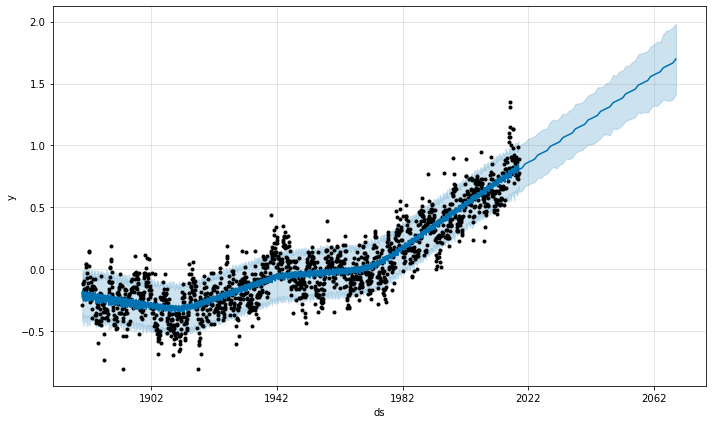

In [142]:
pro_holiday= Prophet(holidays=temp_season)
pro_holiday.fit(df)
future_data = pro_holiday.make_future_dataframe(periods=50, freq = 'Y')
 
#forecast the data for future data
forecast_data = pro_holiday.predict(future)
pro_holiday.plot(forecast_data);

# Further materials

- [Prophet facebook-changing hyperparameters](https://towardsdatascience.com/facebook-prophet-for-time-series-forecasting-in-python-part1-d9739cc79b1d)


- [Complete example of time series analysis](https://futurice.com/blog/business-forecasting-with-facebook-prophet)


- [Understanding ChangePoints I](https://pythondata.com/forecasting-time-series-data-prophet-trend-changepoints/)


- [Understanding ChangePoints II](https://www.kaggle.com/gauravduttakiit/trend-changepoints-using-facebook-prophet)